# Classify the Iris types 

In [42]:
#import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [44]:
#load dataset
df=pd.read_csv('IRIS.csv')

In [46]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [48]:
#checking null value
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [50]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [53]:
#descriptive statastics
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [55]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [61]:
df.shape

(150, 5)

In [63]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


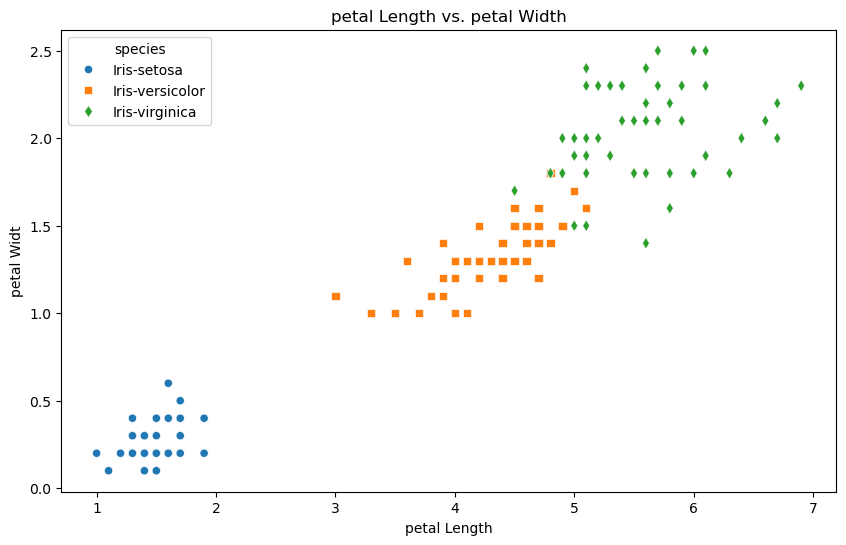

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,x='petal_length', y='petal_width', hue='species', style='species', markers=["o","s","d"])
plt.title('petal Length vs. petal Width')
plt.xlabel('petal Length')
plt.ylabel('petal Widt')
plt.show()
    

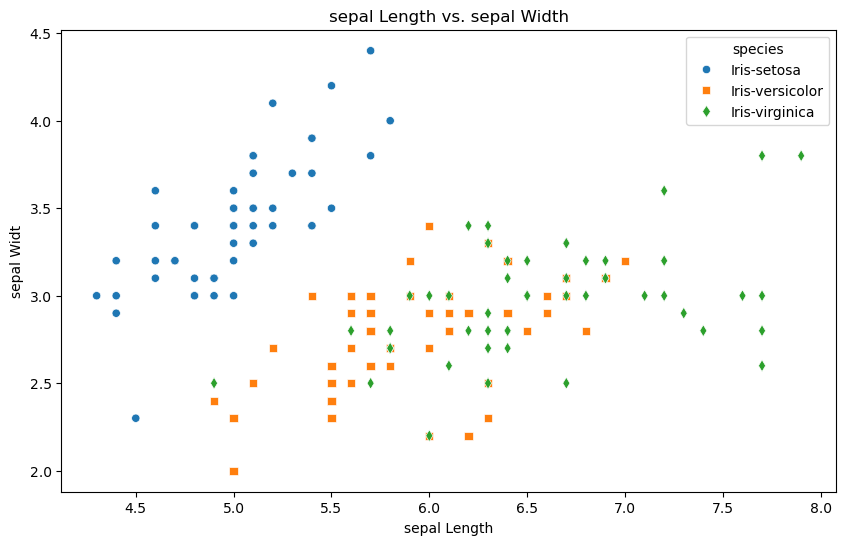

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,x='sepal_length', y='sepal_width', hue='species', style='species', markers=["o","s","d"])
plt.title('sepal Length vs. sepal Width')
plt.xlabel('sepal Length')
plt.ylabel('sepal Widt')
plt.show()

In [69]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
X=df.drop('species',axis=1)

In [73]:
y = df['species'] 

In [75]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [77]:
# Check the lengths of X and y
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")

Length of X: 150
Length of y: 150


In [79]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make prediction
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [81]:
from sklearn.cluster import KMeans


# Create a KMeans object
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')

# Apply K-means clustering
kmeans.fit(X)

C:\Users\Ubax\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [83]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
centroids= kmeans.cluster_centers_
centroids

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

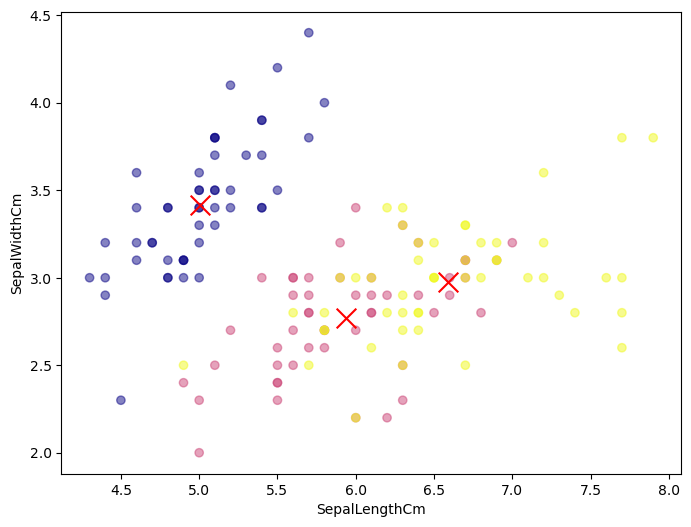

In [91]:
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='plasma', alpha=0.5, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='r', label='Centroids')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

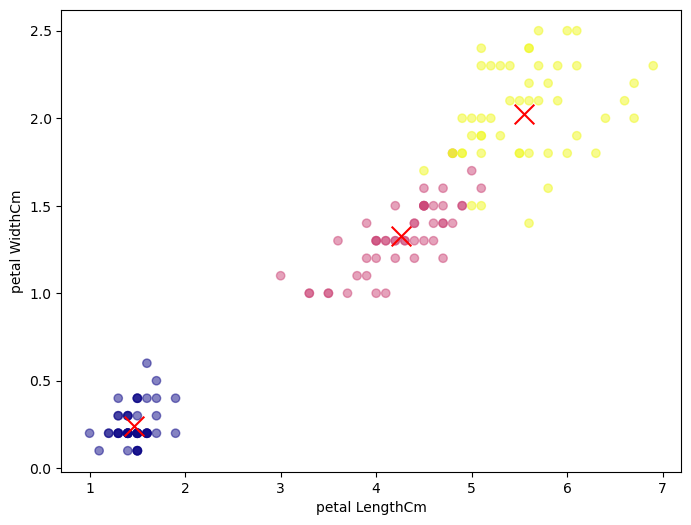

In [95]:
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=labels, cmap='plasma', alpha=0.5, label='Data Points')
plt.scatter(centroids[:, 2], centroids[:, 3], marker='x', s=200, c='r', label='Centroids')
plt.xlabel('petal LengthCm')
plt.ylabel('petal WidthCm')
plt.show()